Student Name: Vipul Popat
Student ID: 18195121

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [58]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA
#### added by me
from numpy import array
from numpy import mean
from numpy import cov



As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [59]:
a_x = 0.05
a_y= 10

In [60]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [61]:
data.shape

(20, 2)

[[ 0.00000000e+00 -2.77835823e+00]
 [ 1.00755098e+00  6.62231201e-02]
 [ 2.02717243e+00  5.21482328e+00]
 [ 3.03562956e+00  8.14416731e+00]
 [ 3.99939611e+00  1.77688909e+01]
 [ 4.92894496e+00  1.70192496e+01]
 [ 5.85366797e+00  1.90564548e+01]
 [ 7.15205128e+00  3.24674125e+01]
 [ 8.01355627e+00  3.00412964e+01]
 [ 8.93290692e+00  3.72173906e+01]
 [ 9.84152510e+00  3.70575355e+01]
 [ 1.10459242e+01  4.38392993e+01]
 [ 1.21843283e+01  4.39675650e+01]
 [ 1.28589667e+01  5.58825921e+01]
 [ 1.40584843e+01  5.39481383e+01]
 [ 1.47927017e+01  6.48066769e+01]
 [ 1.59079725e+01  6.13771947e+01]
 [ 1.70942146e+01  7.12737134e+01]
 [ 1.78037402e+01  6.76055721e+01]
 [ 1.90982442e+01  7.37920832e+01]]


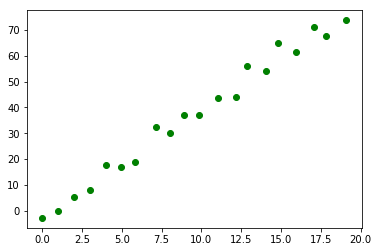

In [62]:
print(data)
plt.plot(data[:, 0], data[:, 1], 'go')

In [69]:
class CustomPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components


    def custom_fit(self, matrix):
        # derive mean of each column and substract from original data
        self.mean_data = np.mean(data, axis=0)
        centered_data = data - self.mean_data
        # calculate the covariance
        covariance_data = np.cov(centered_data,rowvar=False)
        values, vectors = eig(covariance_data) 
        #(square each value so that magnitude and not sign is taken into account when ordering)
        # thanks to Cormac
        sorted_eigen_values_indexes = np.square(values).argsort()[::-1]
        sorted_eigen_values = values[sorted_eigen_values_indexes]
        sorted_eigen_vectors = vectors[sorted_eigen_values_indexes]
        self.eigen_values = sorted_eigen_values[:self.n_components]
        self.eigen_vectors = sorted_eigen_vectors.T[:self.n_components,:]
        
    def transform(self, matrix):
        # learnt from url posted by Abhijit that transform should be dot product of eigen vector and input data
        matrix = matrix - self.mean_data
        return np.dot(matrix, self.eigen_vectors.T)

In [70]:
for num_components in (1,2):
    pca = PCA(n_components=num_components)
    pca_custom = CustomPCA(num_components)
    
    pca_fit = pca.fit(data)
    pca_custom_fit = pca_custom.custom_fit(data)
    
    print("PCA Eigen Vectors = ", pca_fit.components_)
    print("PCA Custom Eigen Vectors = ", pca_custom.eigen_vectors)
    print("PCA Eigen Values = ", pca_fit.explained_variance_)
    print("PCA Custom Eigen Values = ", pca_custom.eigen_values)
    
    data_pca_transform = pca.transform(data)
    data_pca_custom_transform = pca_custom.transform(data)

    print("PCA Transformed data = ", data_pca_transform)
    print("PCA Custom Transformed data = " , data_pca_custom_transform)

PCA Eigen Vectors =  [[-0.23155766 -0.97282118]]
PCA Custom Eigen Vectors =  [[ 0.23155766 -0.97282118]]
PCA Eigen Values =  [640.6828474]
PCA Custom Eigen Values =  [640.6828474]
PCA Transformed data =  [[ 40.78425347]
 [ 37.78367834]
 [ 32.5389099 ]
 [ 29.455666  ]
 [ 19.86936348]
 [ 20.38338626]
 [ 18.18742326]
 [  4.84030894]
 [  7.00099796]
 [ -0.19294115]
 [ -0.24782823]
 [ -7.1241595 ]
 [ -7.51254528]
 [-19.25995374]
 [-17.65583362]
 [-28.38926363]
 [-25.31124019]
 [-35.21346662]
 [-31.80931715]
 [-38.12743851]]
PCA Custom Transformed data =  [[ 36.39306398]
 [ 33.85910114]
 [ 29.08653501]
 [ 26.47032306]
 [ 17.33035559]
 [ 18.27486669]
 [ 16.50715708]
 [  3.76134397]
 [  6.32100915]
 [ -0.44716459]
 [ -0.08125667]
 [ -6.39981228]
 [ -6.26098569]
 [-17.69595875]
 [-15.53632365]
 [-25.92972632]
 [-22.33520392]
 [-31.68806345]
 [-27.95532179]
 [-33.67393854]]
PCA Eigen Vectors =  [[-0.23155766 -0.97282118]
 [-0.97282118  0.23155766]]
PCA Custom Eigen Vectors =  [[ 0.23155766 -0.97